<Figure size 432x288 with 0 Axes>

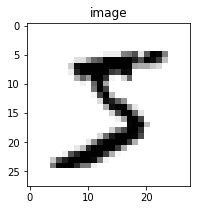

图像数据的形状大小为 (28, 28)
图像数据的标签为 [5]


RuntimeError: (PreconditionNotMet) The third-party dynamic library (cudnn64_7.dll) that Paddle depends on is not configured correctly. (error code is 126)
  Suggestions:
  1. Check if the third-party dynamic library (e.g. CUDA, CUDNN) is installed correctly and its version is matched with paddlepaddle you installed.
  2. Configure third-party dynamic library environment variables as follows:
  - Linux: set LD_LIBRARY_PATH by `export LD_LIBRARY_PATH=...`
  - Windows: set PATH by `set PATH=XXX; (at ..\paddle\phi\backends\dynload\dynamic_loader.cc:305)


In [5]:
import paddle
from paddle.nn import Linear
import paddle.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

train_dataset = paddle.vision.datasets.MNIST(mode='train')

train_data_0 = np.array(train_dataset[0][0])
train_label_0 = np.array(train_dataset[0][1])

plt.figure("Image")
plt.figure(figsize=(3, 3))
plt.imshow(train_data_0, cmap=plt.cm.binary)
plt.title('image')
plt.show()

print('图像数据的形状大小为', train_data_0.shape)
print('图像数据的标签为', train_label_0)


class MNIST(paddle.nn.Layer):
    def __init__(self):
        super(MNIST, self).__init__()
        self.fc = paddle.nn.Linear(in_features=784, out_features=1)

    def forward(self, inputs):
        outputs = self.fc(inputs)
        return outputs


def norm_img(img):
    assert len(img.shape) == 3
    batch_size, img_h, img_w = img.shape[0], img.shape[1], img.shape[2]

    img = img / 255

    img = paddle.reshape(img, [batch_size, img_w * img_h])
    return img


paddle.vision.set_image_backend('cv2')
model = MNIST()


def train(model):
    model.train()
    train_loader = paddle.io.DataLoader(paddle.vision.datasets.MNIST(mode='train'), batch_size=16, shuffle=True)
    opt = paddle.optimizer.SGD(learning_rate=0.001, parameters=model.parameters())

    EPOCH_NUM = 10
    loss_list = []
    for epoch in range(EPOCH_NUM):
        for batch_id, data in enumerate(train_loader()):
            images = norm_img(data[0]).astype('float32')
            labels = data[1].astype('float32')

            predicts = model(images)

            loss = F.square_error_cost(predicts, labels)
            avg_loss = paddle.mean(loss)

            if batch_id % 600 == 0:
                loss_val = avg_loss.numpy()[0]
                print('epoch_id:{}, batch_id:{}, loss is :{}'.format(epoch, batch_id, loss_val))

            avg_loss.backward()
            opt.step()
            opt.clear_grad()

    return loss_list

lost_list = train(model)


def plot(loss_list):
    plt.figure(figsize=(8, 4))
    freqs = range(len(loss_list))

    plt.plot(freqs, loss_list, color='r', label="Train loss")
    plt.xlabel('freq')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

plot(lost_list)

